#Exploratory Data Analysis Project -- Country Vaccinations Analysis


**Introduction**

To bring COVID-19 to an end, a large share of the world needs to be immune to the virus. The safest way to achieve this is with a vaccine.  Now, the challenge becomes to making the vaccines available to people in all countries — not just in rich countries. For this project, I want to track the progress and investigate on a few questions:

1. How many people are fully vaccinated in each country?
2. How many people are vaccinated (vaccinated for once or twice) in each country? 
3. The progress of the number of people getting vaccinated and fully vaccinated in the top three countries (the three countries with more people fully vaccinated) daily? 
4. What is the proportion of differet types of vaccines used globally? 

Data origin: https://www.kaggle.com/gpreda/covid-world-vaccination-progress 

Github blog post: https://github.com/cicichang11/Analysis-on-COVID19-Vaccinations-Progress/blob/main/Analysis%20on%20COVID-19%20World%20Vaccinations%20Progress_Cici%20Chang.pdf

**part 1: Select and Prepare Data**

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# import data
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/449 data/country_vaccinations.csv"
vaccinations_df = pd.read_csv(path)
vaccinations_df.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7vlvNakpeKKt_z8lZA3q62oCWIWKw94y9A8XRioElF44jFC6fC8lI
Mounted at /content/drive


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


**part 2 (phase 1):** Data Wrangling

*a. Units of analysis*

In [ ]:
vaccinations_df.shape

(4241, 15)

In [ ]:
vaccinations_df.info

<bound method DataFrame.info of        country  ...                                     source_website
0      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
1      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
2      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
3      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
4      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
...        ...  ...                                                ...
4236  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1365020696...
4237  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1365020696...
4238  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1365020696...
4239  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1365020696...
4240  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1365020696...

[4241 rows x 15 columns]>

In [ ]:
vaccinations_df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

*b. Missing values*

In [ ]:
vaccinations_df.isnull().sum()

country                                   0
iso_code                                296
date                                      0
total_vaccinations                     1455
people_vaccinated                      1875
people_fully_vaccinated                2665
daily_vaccinations_raw                 1884
daily_vaccinations                      149
total_vaccinations_per_hundred         1455
people_vaccinated_per_hundred          1875
people_fully_vaccinated_per_hundred    2665
daily_vaccinations_per_million          149
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [ ]:
vaccinations_df.replace(np.nan, 'N/A')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0,0,N/A,N/A,N/A,0,0,N/A,N/A,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,N/A,N/A,N/A,N/A,64,N/A,N/A,N/A,22,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128,128,N/A,N/A,64,0,0,N/A,22,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188,188,N/A,60,63,0.01,0.01,N/A,22,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266,266,N/A,78,66,0.01,0.01,N/A,23,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,Zimbabwe,ZWE,2021-02-21,N/A,N/A,N/A,N/A,328,N/A,N/A,N/A,22,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365020696...
4237,Zimbabwe,ZWE,2021-02-22,1314,1314,N/A,N/A,328,0.01,0.01,N/A,22,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365020696...
4238,Zimbabwe,ZWE,2021-02-23,4041,4041,N/A,2727,808,0.03,0.03,N/A,54,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365020696...
4239,Zimbabwe,ZWE,2021-02-24,7872,7872,N/A,3831,1312,0.05,0.05,N/A,88,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1365020696...


*c. Duplicated records*

In [ ]:
# Based on the analysis above: vaccinations_df.shape
# (4241, 15)
# Rows containing duplicate data
duplicate_rows_df = vaccinations_df[vaccinations_df.duplicated()]
print('The number of duplicate rows: ', duplicate_rows_df.shape)

The number of duplicate rows:  (0, 15)


*d. Simplify the dataset: group different columns by country name for the sake of some further analysis*

In [ ]:
vaccinations_by_country = vaccinations_df.groupby('country').sum()
print(vaccinations_by_country)
vaccinations_by_country.head()

                      total_vaccinations  ...  daily_vaccinations_per_million
country                                   ...                                
Albania                     3.112900e+04  ...                          2487.0
Algeria                     7.503000e+04  ...                          1568.0
Andorra                     9.056000e+03  ...                         24071.0
Anguilla                    4.103000e+03  ...                        111452.0
Argentina                   1.764902e+07  ...                         17176.0
...                                  ...  ...                             ...
United Arab Emirates        1.646107e+08  ...                        497187.0
United Kingdom              4.929673e+08  ...                        273328.0
United States               1.586615e+09  ...                        190870.0
Wales                       2.234566e+07  ...                        288135.0
Zimbabwe                    2.423400e+04  ...                   

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Albania,31129.0,14501.0,2316.0,2897.0,7164.0,1.09,0.50,0.08,2487.0
Algeria,75030.0,0.0,0.0,30.0,69070.0,0.17,0.00,0.00,1568.0
Andorra,9056.0,9056.0,0.0,0.0,1860.0,11.72,11.72,0.00,24071.0
Anguilla,4103.0,4103.0,0.0,1421.0,1672.0,27.35,27.35,0.00,111452.0
Argentina,17649017.0,11691582.0,5409989.0,524356.0,776343.0,39.06,25.88,11.99,17176.0


In [ ]:
# analysis on people_fully_vaccinated and total_vaccinations for the sake of further analysis 
# people_fully_vaccinations
fully_vaccinations_Q1=vaccinations_by_country['people_fully_vaccinated'].quantile(.25)
fully_vaccinations_Q3=vaccinations_by_country['people_fully_vaccinated'].quantile(.75)
fully_vaccinations_IQR = fully_vaccinations_Q3 - fully_vaccinations_Q1

print("Analysis on people who have been fully vaccinated in each country:")
print("Min Value", vaccinations_by_country['people_fully_vaccinated'].min())
print("Max Value ", vaccinations_by_country['people_fully_vaccinated'].max())
print("Q1 ", fully_vaccinations_Q1)
print("Q3 ", fully_vaccinations_Q3)
print("IQR ", fully_vaccinations_IQR)

Analysis on people who have been fully vaccinated in each country:
Min Value 0.0
Max Value  361642791.0
Q1  0.0
Q3  1729221.0
IQR  1729221.0


In [ ]:
# analysis on people_fully_vaccinated and total_vaccinations for the sake of further analysis 
# total_vaccinations
total_vaccinations_Q1=vaccinations_by_country['total_vaccinations'].quantile(.25)
total_vaccinations_Q3=vaccinations_by_country['total_vaccinations'].quantile(.75)
total_vaccinations_IQR = total_vaccinations_Q3 - total_vaccinations_Q1

print("Analysis on the total vaccinations in each country:")
print("Min Value", vaccinations_by_country['total_vaccinations'].min())
print("Max Value ", vaccinations_by_country['total_vaccinations'].max())
print("Q1 ", total_vaccinations_Q1)
print("Q3 ", total_vaccinations_Q3)
print("IQR ", total_vaccinations_IQR)

Analysis on the total vaccinations in each country:
Min Value 107.0
Max Value  1586614892.0
Q1  49746.5
Q3  15837417.5
IQR  15787671.0


**part 2 (phase 2):** Data Exploration and Visulizations

Q1: How many people are fully vaccinated in each country?

(63, 9)
The top three countries that have more people fully vaccinated are ['United States', 'Israel', 'Germany']


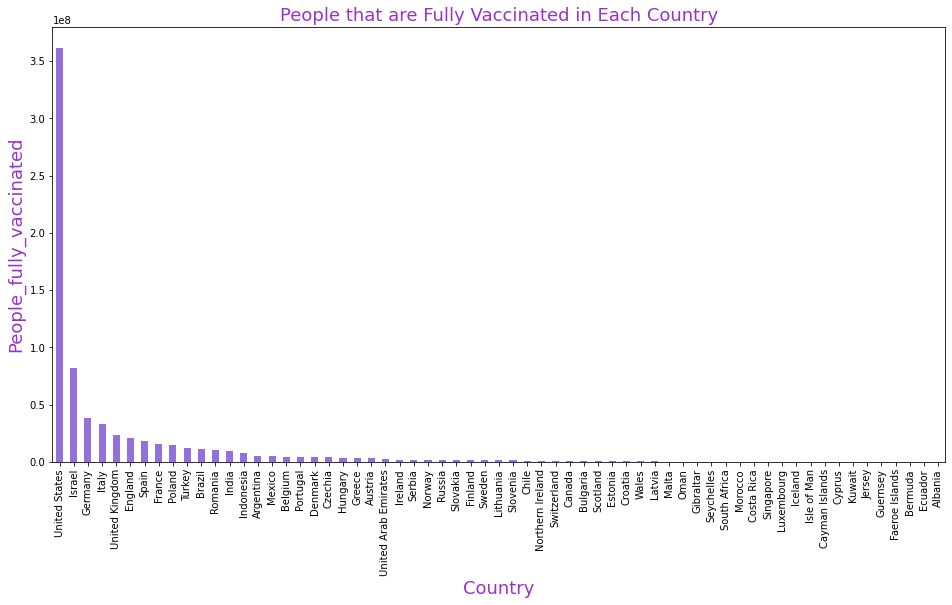

In [ ]:
newdf = vaccinations_by_country[vaccinations_by_country.people_fully_vaccinated != 0]
newdf = newdf.sort_values(by='people_fully_vaccinated', ascending=False)
print(newdf.shape)
newdf['people_fully_vaccinated'].plot(kind='bar', color = 'mediumpurple', figsize=(16, 8))
plt.xticks(rotation=90)
plt.xlabel('Country', color = 'darkorchid', fontsize = 18)
plt.ylabel('People_fully_vaccinated', color = 'darkorchid', fontsize = 18)
plt.title('People that are Fully Vaccinated in Each Country', color = 'darkorchid', fontsize = 18)

top_3_full = newdf.head(3)
top_3_full_list = []
for x in top_3_full.index:
  top_3_full_list.append(x)
print("The top three countries that have more people fully vaccinated are", top_3_full_list)

Q2: How many people are vaccinated (vaccinated for once or twice) in each country? 

(107, 9)
The top three countries that have more vaccinations are ['United States', 'United Kingdom', 'England']


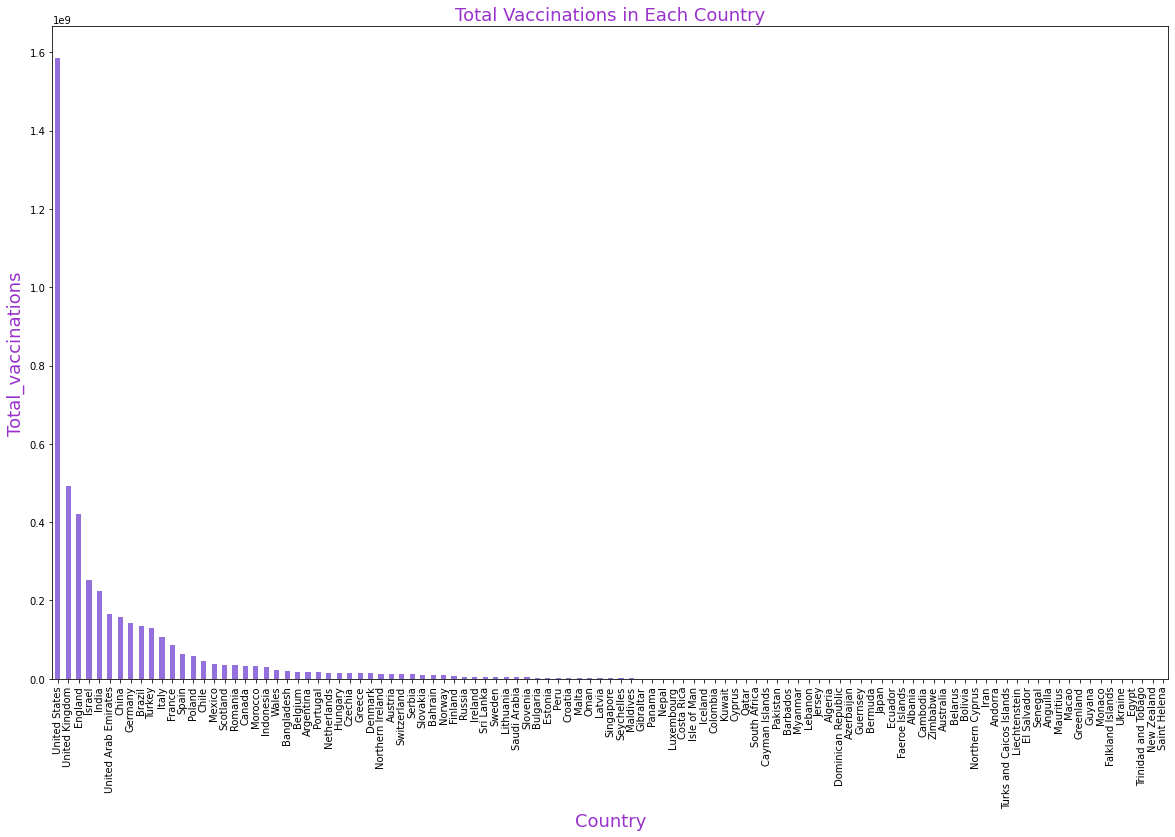

In [ ]:
newdf_vac = vaccinations_by_country.sort_values(by='total_vaccinations', ascending=False)
print(newdf_vac.shape)
newdf_vac['total_vaccinations'].plot(kind='bar', color = 'mediumpurple', figsize=(20, 12))
plt.xticks(rotation=90)
plt.xlabel('Country', color = 'darkorchid', fontsize = 18)
plt.ylabel('Total_vaccinations', color = 'darkorchid', fontsize = 18)
plt.title('Total Vaccinations in Each Country', color = 'darkorchid', fontsize = 18)

top_3_vac = newdf_vac.head(3)
top_3_vac_list = []
for x in top_3_vac.index:
  top_3_vac_list.append(x)
print("The top three countries that have more vaccinations are", top_3_vac_list)

Q3: The progress of the number of people getting vaccinated and fully vaccinated in the top three countries (the three countries with more people fully vaccinated) daily? 


Based on Q2, we know that the top 3 leading countries on the total amount of vaccinations are United States, United Kingdom, and England.


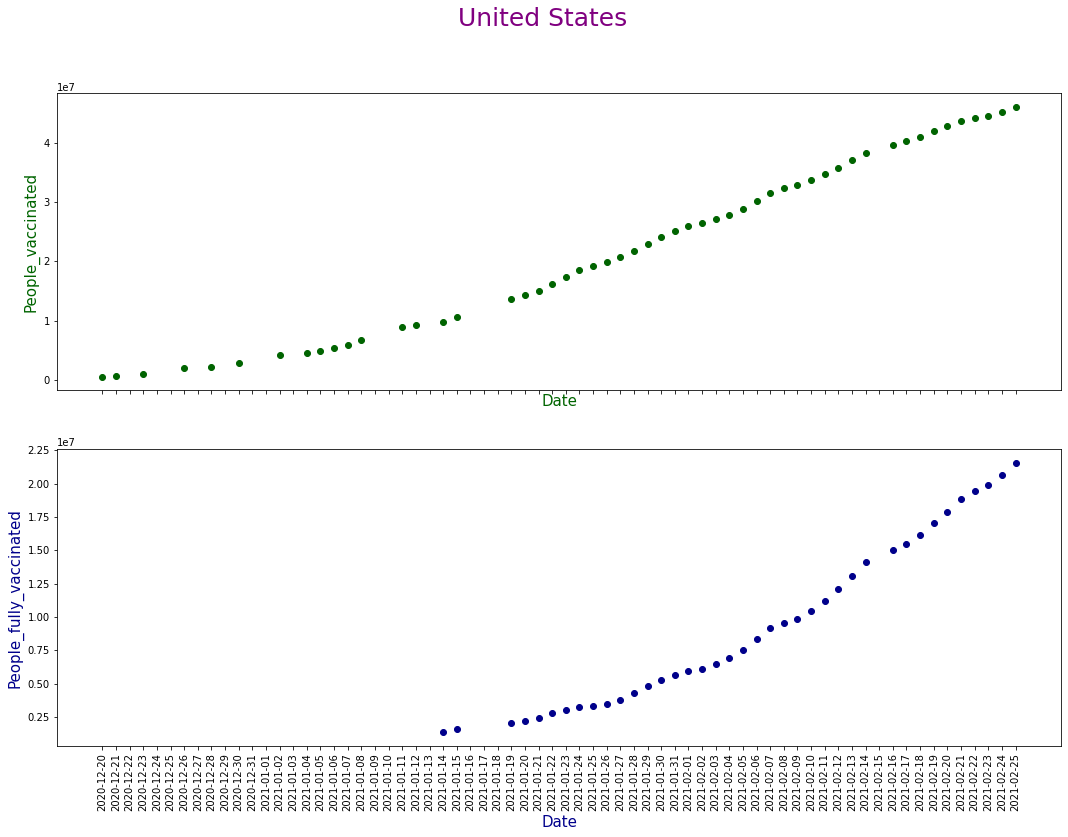

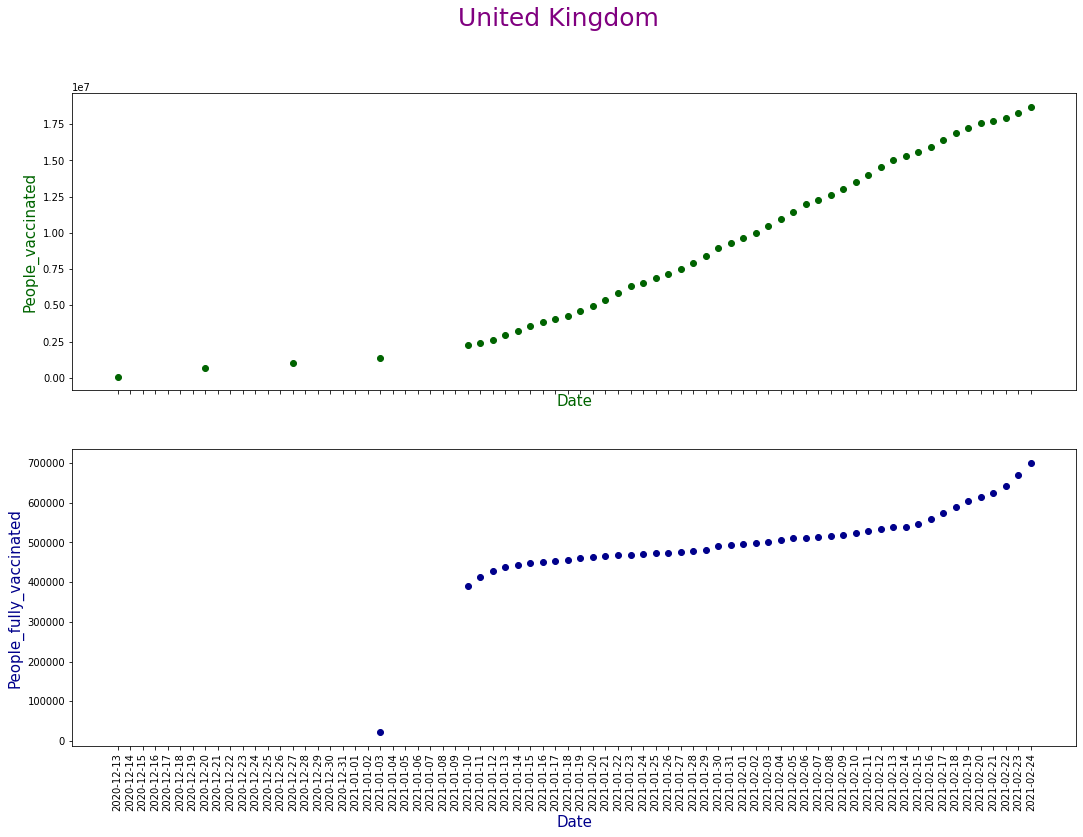

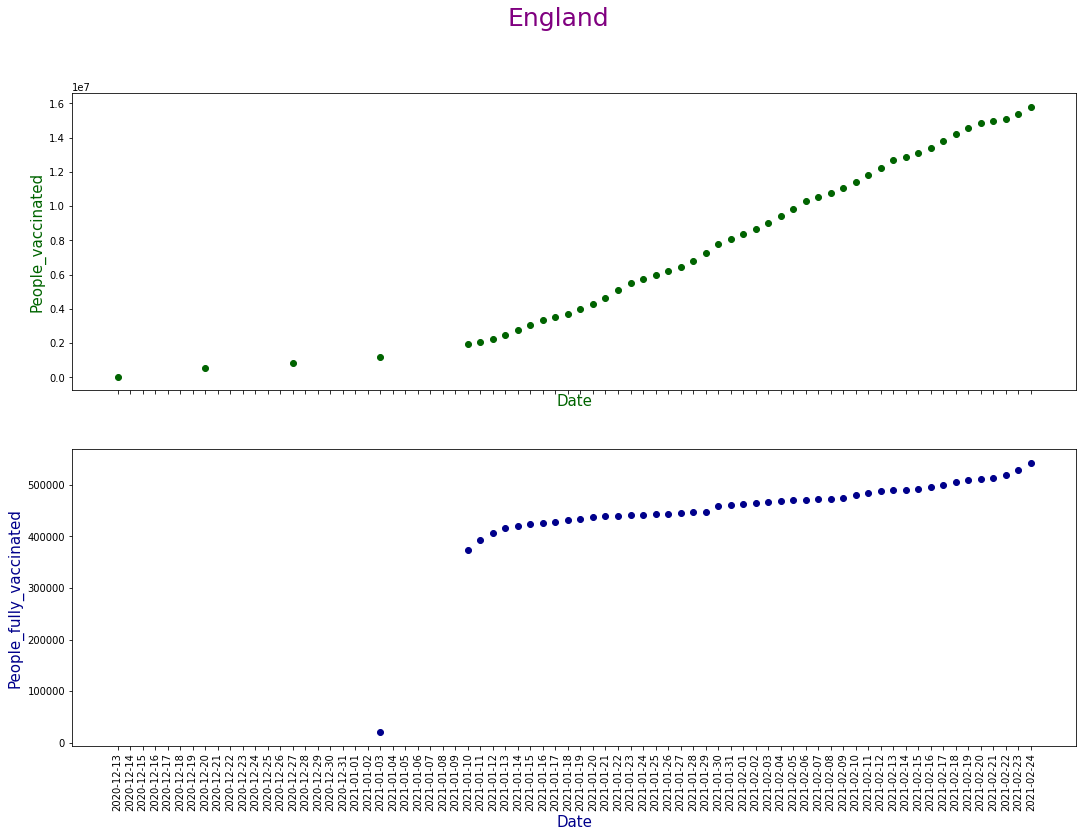

In [ ]:
print("Based on Q2, we know that the top 3 leading countries on the total amount of vaccinations are United States, United Kingdom, and England.")

for x in ['United States', 'United Kingdom', 'England']:
  country_df = vaccinations_df[vaccinations_df['country'] == x]
  fig, ax = plt.subplots(2, sharex=True, figsize=(18, 12))
  ax[0].scatter(x = country_df['date'], y = country_df['people_vaccinated'],color='darkgreen')
  ax[0].set_xlabel('Date', color = 'darkgreen', fontsize = 15)
  ax[0].set_ylabel('People_vaccinated', color = 'darkgreen', fontsize = 15)
  ax[0].tick_params(axis='x', labelrotation = 90)
  
  ax[1].scatter(x = country_df['date'], y = country_df['people_fully_vaccinated'],color='darkblue')
  ax[1].set_xlabel('Date', color = 'darkblue', fontsize = 15)
  ax[1].set_ylabel('People_fully_vaccinated', color = 'darkblue', fontsize = 15)
  ax[1].tick_params(axis='x', labelrotation = 90)

  fig.suptitle(x, fontsize=25, color='purple')

Q4: What is the proportion of differet types of vaccines used globally? 

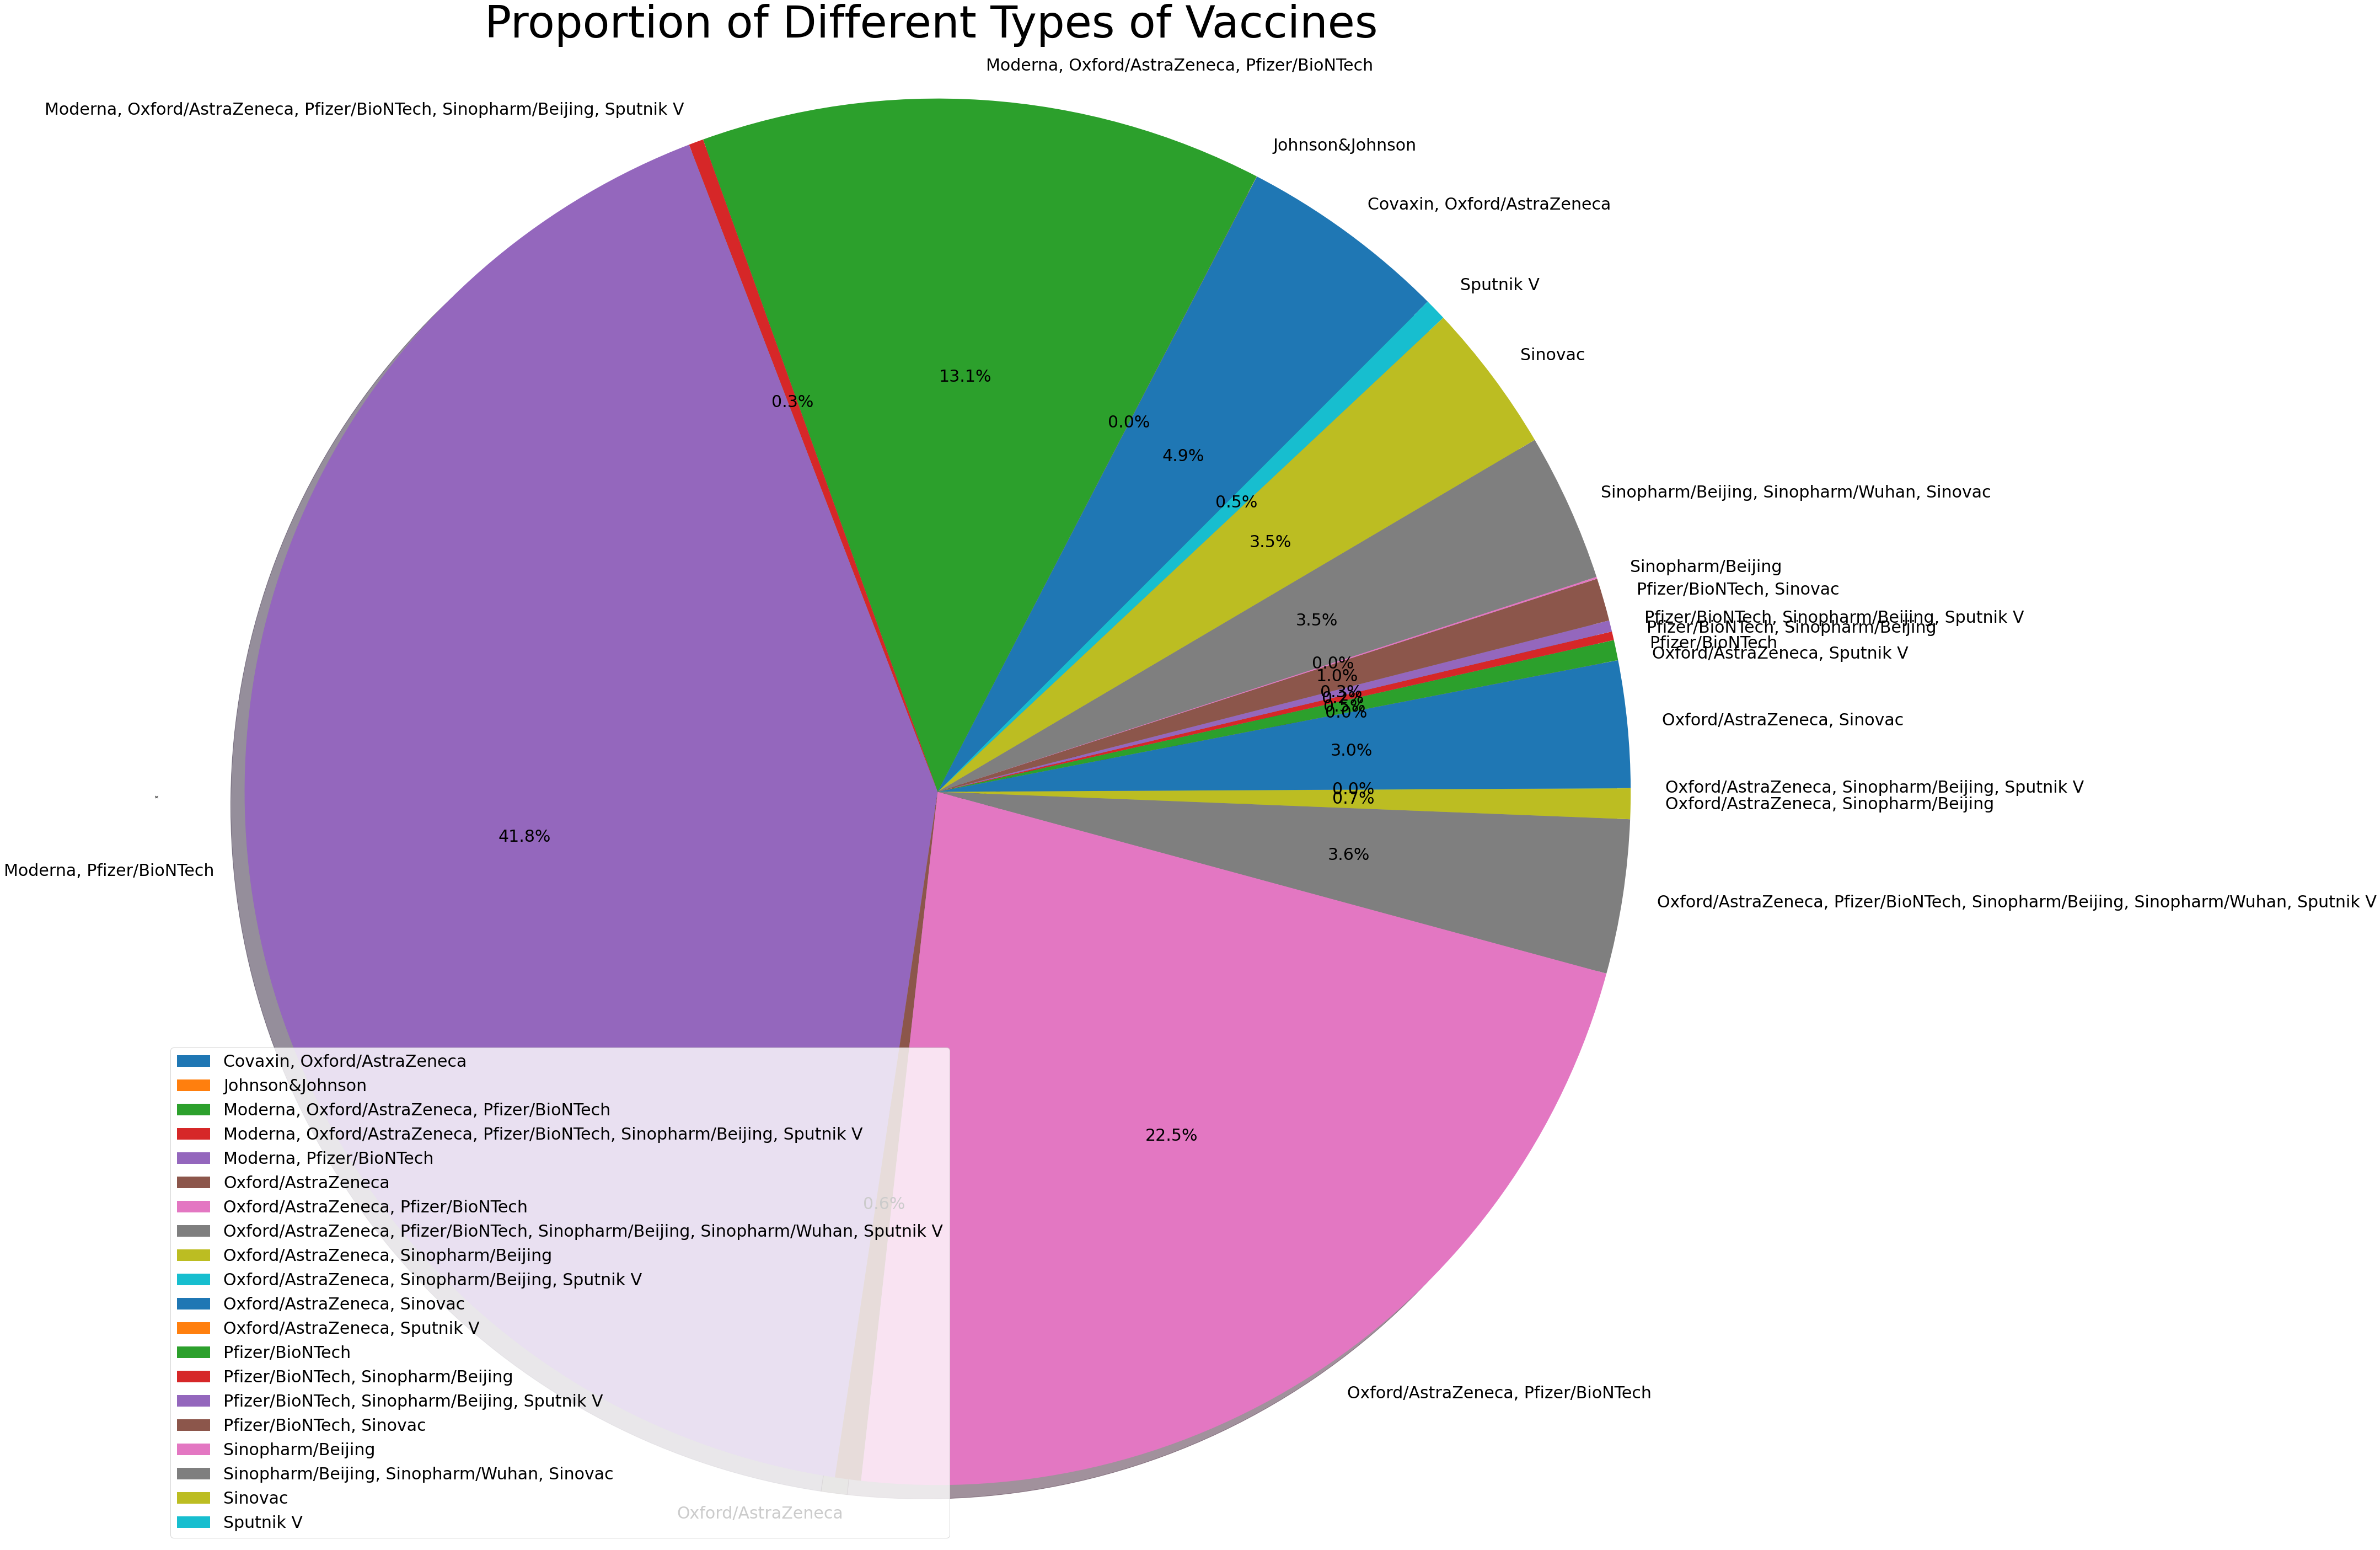

In [ ]:
vaccinations_type = vaccinations_df.groupby('vaccines').sum()
vaccinations_type['portion'] = vaccinations_type['total_vaccinations'] / vaccinations_type['total_vaccinations'].sum()
#vaccinations_type.head()
vaccinations_type.plot.pie(y='portion', label= 'x', autopct='%.1f%%', startangle=45, shadow=True, labeldistance=1.05, figsize=(50, 50), fontsize=30)
plt.title('Proportion of Different Types of Vaccines', fontsize=80)
plt.axis('equal')
plt.legend(loc='lower left', fontsize = 30) # legend
plt.show()
